In [77]:
from roboflow import Roboflow
from configparser import ConfigParser 
from PIL import Image
conf = ConfigParser()
conf.read("/home/james/api_keys.conf")
rf = Roboflow(api_key=conf["ROBOFLOW"]["key"])
project = rf.workspace().project("csv-to-txt-mutvh")
model = project.version(1).model
import numpy as np 
import cv2


loading Roboflow workspace...
loading Roboflow project...


In [15]:

# infer on a local image
results = model.predict("/mnt/c/Users/james/data/braces_and_teeth/teeth2/train/2001.png", confidence=40, overlap=30).json()

In [17]:
results

{'predictions': [{'x': 146.5,
   'y': 124.5,
   'width': 35.0,
   'height': 39.0,
   'confidence': 0.8248906135559082,
   'class': 'Tooth',
   'class_id': 1,
   'image_path': '/mnt/c/Users/james/data/braces_and_teeth/teeth2/train/2001.png',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 111.5,
   'y': 124.5,
   'width': 31.0,
   'height': 37.0,
   'confidence': 0.8013938665390015,
   'class': 'Tooth',
   'class_id': 1,
   'image_path': '/mnt/c/Users/james/data/braces_and_teeth/teeth2/train/2001.png',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 82.0,
   'y': 122.5,
   'width': 24.0,
   'height': 35.0,
   'confidence': 0.756342351436615,
   'class': 'Tooth',
   'class_id': 1,
   'image_path': '/mnt/c/Users/james/data/braces_and_teeth/teeth2/train/2001.png',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 178.0,
   'y': 123.5,
   'width': 24.0,
   'height': 37.0,
   'confidence': 0.6704254746437073,
   'class': 'Tooth',
   'class_id': 1,
   'image_path': '/mnt/c/

In [22]:
results["image"]

{'width': '256', 'height': '256'}

In [6]:
import supervision as sv

In [20]:
single_brace = Image.open("./images/single_brace.png")

In [90]:
asp_ratio = single_brace.size[0]/single_brace.size[1]

In [101]:
results["predictions"].sort(key=lambda x: x["x"])

In [114]:
orig_image = Image.open("/mnt/c/Users/james/data/braces_and_teeth/teeth2/train/2001.png")

#results = model.predict("/mnt/c/Users/james/data/braces_and_teeth/teeth2/train/2001.png", confidence=40, overlap=30).json()

for i in range(0, len(results["predictions"])):
    pred = results["predictions"][i]
    if i > 0: 
        prev = results["predictions"][i-1]
        orig_image = Image.fromarray(
                        cv2.line(np.array(orig_image), 
                            (int(prev["x"]*0.97),int(prev["y"]*1.03)), (int(pred["x"]*0.97),int(pred["y"]*1.03)),
                            (128,128,128),1)
                    )
    brace_w = int(pred["width"]/2)
    brace_h = int(brace_w/asp_ratio)
    orig_image.paste(single_brace.resize((brace_w,brace_h)), (int(pred["x"]*0.97), int(pred["y"]*.99)))

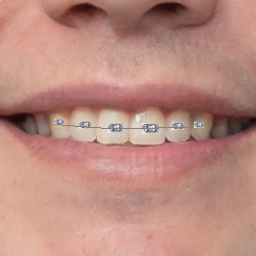

In [115]:
orig_image

In [ ]:
def process_frame(frame: np.ndarray, _) -> np.ndarray:
    results = model.predict(frame, imgsz=1280)[0]
    for i in range(0, len(results["predictions"])):
        pred = results["predictions"][i]
        if i > 0: 
            prev = results["predictions"][i-1]
            orig_image = Image.fromarray(
                            cv2.line(np.array(orig_image), 
                                (int(prev["x"]*0.97),int(prev["y"]*1.03)), (int(pred["x"]*0.97),int(pred["y"]*1.03)),
                                (128,128,128),1)
                        )
        brace_w = int(pred["width"]/2)
        brace_h = int(brace_w/asp_ratio)
        orig_image.paste(single_brace.resize((brace_w,brace_h)), (int(pred["x"]*0.97), int(pred["y"]*.99)))

        
    return frame